# Anomaly Detection

-----
## 1. load data

In [1]:
import scipy.io

In [2]:
mat = scipy.io.loadmat('ex8data1.mat')

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [4]:
X = mat['X']
Xval = mat['Xval']
yval = mat['yval']

In [5]:
print('X:',X.shape)
print('Xval:',Xval.shape)
print('Yval:',yval.shape)

X: (307, 2)
Xval: (307, 2)
Yval: (307, 1)


In [6]:
import matplotlib.pyplot as plt

(0.0, 30.0)

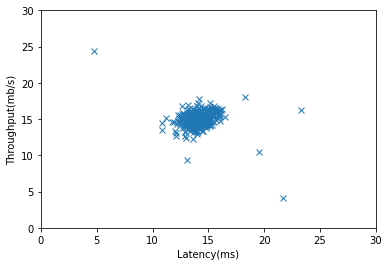

In [7]:
plt.plot(X[:,0], X[:,1],'x')
plt.ylabel('Throughput(mb/s)')
plt.xlabel('Latency(ms)')
plt.ylim(0,30)
plt.xlim(0,30)

---
## 2.1 Gaussian Dsitribution

In [11]:
import numpy as np

In [12]:
def estimateGaussian(X):
    [m,n] = X.shape
    print('m:',m)
    print('n:',n)
    mu = np.mean(X,0) #each col
    sigma2 = sum(np.square(X-mu))/m  # equal np.var(X)
    return [mu,sigma2]

In [10]:
[mu, sigma2] = estimateGaussian(X)
print('mu:',mu)
print('sigma2:',sigma2)

m: 307
n: 2
mu: [14.11222578 14.99771051]
sigma2: [1.83263141 1.70974533]


## 2.2 Estimating parameters for a Gaussian

In [11]:
from scipy.stats import norm

In [16]:
import math

In [18]:
sigma2 = np.diag(sigma2) #diagonal covariance matrix
print('sigma2:',sigma2)

sigma2: [[60.97489373  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.         53.20572186  0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.         58.51546272  0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.         84.20403725  0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         65.26859177  0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         89.57487757
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  55.63349911  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         8

In [13]:
def multivariateGaussian(X, mu, sigma2):
    k = mu.size
    print('k:',k)
    p = np.power(2*math.pi,-k/2)*np.power(np.linalg.det(sigma2), -0.5)\
    * np.exp(-0.5*np.sum(np.dot(np.square(X-mu),np.linalg.inv(sigma2)),1)) 
    #p = p1 * p2...*pj, 
    #sum for each col: exp(g1) * exp(g2) = exp(g1+g2)
    return p

In [24]:
p = multivariateGaussian(X, mu, sigma2)
print('p:',p)

k: 2
p: [6.47082850e-02 5.03041697e-02 7.24503459e-02 5.03157451e-02
 6.36849657e-02 4.24583228e-02 4.79094514e-02 3.65111476e-02
 1.86657981e-02 5.06882606e-02 2.65150875e-02 8.47130185e-02
 7.10473222e-02 6.95531914e-02 3.77788348e-02 8.27029589e-02
 8.77921221e-02 8.68763043e-02 6.91708642e-02 9.73470177e-03
 7.57066464e-02 8.83768074e-02 3.74100482e-02 8.71375788e-02
 4.12630362e-02 2.48800242e-02 7.90901300e-02 7.59228904e-02
 8.08257085e-02 7.66395995e-02 5.01173495e-02 8.80498288e-02
 6.17880844e-02 5.96234469e-02 2.09024063e-02 4.57936991e-02
 3.53418180e-02 8.21286529e-02 7.24325306e-02 8.49788605e-02
 6.41878342e-02 6.64784465e-02 8.37566936e-02 8.57620375e-02
 6.94628046e-02 5.88478150e-02 3.30652955e-02 7.03092647e-02
 7.77494497e-02 3.59889069e-02 7.34972804e-02 7.56209579e-02
 8.54690789e-02 8.97861557e-02 7.58702322e-02 8.44453776e-02
 8.67966985e-02 8.93502380e-02 7.83008864e-02 6.09965756e-02
 6.89175589e-02 8.93992597e-02 2.35608690e-02 3.92180893e-02
 3.46818928e-02 

In [112]:
x = np.linspace(0,35,70)
y = np.linspace(0,35,70)
xv,yv = np.meshgrid(x,y)
print('x:',x)
print('xv:',xv)
print('yv',yv)

x: [ 0.          0.50724638  1.01449275  1.52173913  2.02898551  2.53623188
  3.04347826  3.55072464  4.05797101  4.56521739  5.07246377  5.57971014
  6.08695652  6.5942029   7.10144928  7.60869565  8.11594203  8.62318841
  9.13043478  9.63768116 10.14492754 10.65217391 11.15942029 11.66666667
 12.17391304 12.68115942 13.1884058  13.69565217 14.20289855 14.71014493
 15.2173913  15.72463768 16.23188406 16.73913043 17.24637681 17.75362319
 18.26086957 18.76811594 19.27536232 19.7826087  20.28985507 20.79710145
 21.30434783 21.8115942  22.31884058 22.82608696 23.33333333 23.84057971
 24.34782609 24.85507246 25.36231884 25.86956522 26.37681159 26.88405797
 27.39130435 27.89855072 28.4057971  28.91304348 29.42028986 29.92753623
 30.43478261 30.94202899 31.44927536 31.95652174 32.46376812 32.97101449
 33.47826087 33.98550725 34.49275362 35.        ]
xv: [[ 0.          0.50724638  1.01449275 ... 33.98550725 34.49275362
  35.        ]
 [ 0.          0.50724638  1.01449275 ... 33.98550725 34.49

In [26]:
xcol = xv.reshape(xv.size,1) #reshape as col
ycol = yv.reshape(yv.size,1)
xcol.shape

(4900, 1)

In [27]:
z = np.concatenate((xcol,ycol),1)
P = multivariateGaussian(z, mu, sigma2)
P = np.reshape(P, (x.size,y.size)) #reshape as two col
print('p:',p)

k: 2
p: [6.47082850e-02 5.03041697e-02 7.24503459e-02 5.03157451e-02
 6.36849657e-02 4.24583228e-02 4.79094514e-02 3.65111476e-02
 1.86657981e-02 5.06882606e-02 2.65150875e-02 8.47130185e-02
 7.10473222e-02 6.95531914e-02 3.77788348e-02 8.27029589e-02
 8.77921221e-02 8.68763043e-02 6.91708642e-02 9.73470177e-03
 7.57066464e-02 8.83768074e-02 3.74100482e-02 8.71375788e-02
 4.12630362e-02 2.48800242e-02 7.90901300e-02 7.59228904e-02
 8.08257085e-02 7.66395995e-02 5.01173495e-02 8.80498288e-02
 6.17880844e-02 5.96234469e-02 2.09024063e-02 4.57936991e-02
 3.53418180e-02 8.21286529e-02 7.24325306e-02 8.49788605e-02
 6.41878342e-02 6.64784465e-02 8.37566936e-02 8.57620375e-02
 6.94628046e-02 5.88478150e-02 3.30652955e-02 7.03092647e-02
 7.77494497e-02 3.59889069e-02 7.34972804e-02 7.56209579e-02
 8.54690789e-02 8.97861557e-02 7.58702322e-02 8.44453776e-02
 8.67966985e-02 8.93502380e-02 7.83008864e-02 6.09965756e-02
 6.89175589e-02 8.93992597e-02 2.35608690e-02 3.92180893e-02
 3.46818928e-02 

In [120]:
level = 10**np.linspace(-20,3,10) #level of the contour
level.size

10

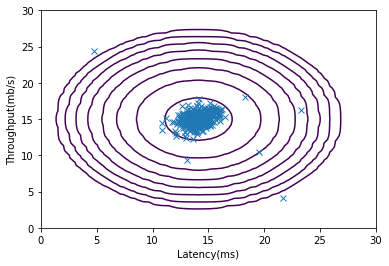

In [121]:
plt.ylabel('Throughput(mb/s)')
plt.xlabel('Latency(ms)')
plt.ylim(0,30)
plt.xlim(0,30)
plt.plot(X[:,0], X[:,1],'x')
plt.contour(xv,yv,P,level)
plt.show()

## 2.3 Selecting the threshold

In [30]:
pval = multivariateGaussian(Xval, mu,sigma2) #mu, sigma2 using the same as training sets

k: 2


In [105]:
#for checking 
e = max(pval)
print('epsilon:',e)
prediction = pval < e
tp = sum((prediction == True)&(yval[:,0] == True))
fp = sum((prediction == False)&(yval[:,0] == True))
fn = sum((prediction == True)&(yval[:,0] == False))

print('prediction shape:',prediction.shape)
print('yval shape:',yval.shape)
print('true positive:',tp) #the number
print('false negative:',fn)
print('flase positive:',fp)

epsilon: 0.08990852779269494
prediction shape: (307,)
yval shape: (307, 1)
true positive: 9
false negative: 297
flase positive: 0


In [24]:
def selectThreshold(yval, pval):
    bestEpsilon = 0
    bestF1 = 0
    epsilons = np.linspace(min(pval),max(pval),1000) #1000 steps
    for e in epsilons:
        prediction = pval < e
        tp = sum((prediction == True)&(yval[:,0] == True))
        fp = sum((prediction == False)&(yval[:,0] == True))
        fn = sum((prediction == True)&(yval[:,0] == False))

        if(tp+fp == 0):
            prec = 0
        else:
            prec = tp/(tp+fp)
            
        if(tp+fn == 0):
            rec = 0
        else:
            rec = tp/(tp+fn)
            
        if(prec+ rec == 0):
            F1 = 0
        else:
            F1 = (2*prec*rec)/(prec+rec)
    
        if(F1 > bestF1):
            bestF1 = F1
            bestEpsilon = e
        
    return bestF1, bestEpsilon

In [107]:
[F1, epsilon] = selectThreshold(yval, pval)
print('epsilon:',epsilon)
print('F1:',F1)

epsilon: 8.999852631901395e-05
F1: 0.8750000000000001


In [126]:
outliers = np.argwhere(p < epsilon) #use best epsilon to find anomaly features
print('outliers found:',outliers.size)

outliers found: 6


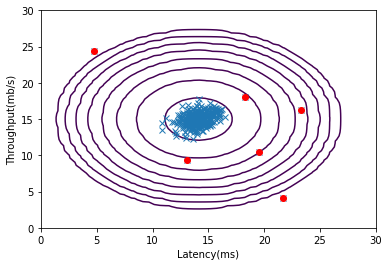

In [127]:
plt.ylabel('Throughput(mb/s)')
plt.xlabel('Latency(ms)')
plt.ylim(0,30)
plt.xlim(0,30)
plt.plot(X[:,0], X[:,1],'x')
plt.contour(xv,yv,P,level)
plt.plot(X[outliers,0], X[outliers,1],'ro')
plt.show()

## 2.4 High dimensional dataset

In [2]:
mat2 = scipy.io.loadmat('ex8data2.mat')

In [6]:
mat2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [9]:
X = mat2['X']
Xval = mat2['Xval']
yval = mat2['yval']

In [20]:
[mu, sigma2] = estimateGaussian(X)
sigma2 = np.diag(sigma2) #diagonal covariance matrix
print('sigma2:',sigma2)

m: 1000
n: 11
sigma2: [[60.97489373  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.         53.20572186  0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.         58.51546272  0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.         84.20403725  0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         65.26859177  0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         89.57487757
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  55.63349911  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
 

In [22]:
p = multivariateGaussian(X, mu,sigma2)
pval = multivariateGaussian(Xval, mu,sigma2)

k: 11
k: 11


In [34]:
[F1, epsilon] = selectThreshold(yval, pval)

In [35]:
print('epsilon:',epsilon)
print('F1:',F1)

epsilon: 1.378607498200029e-18
F1: 0.6153846153846154


In [36]:
outliers = np.argwhere(p < epsilon) #use best epsilon to find anomaly features
print('outliers found:',outliers.size)

outliers found: 117
